In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv' , na_values='?')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\3809759822.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('diabetes.csv' , na_values='?')


In [3]:
df

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Preprocessing

In [4]:
df.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [5]:
'''
max_glu_serum               96420 ----> Drop Column
A1Cresult                   84748 ----> Drop Column
payer_code                  40256 ----> 
medical_specialty           49949 ----> 
weight                      98569 ----> Drop column
race                         2273 ----> Fill with median
diag_1                        21  ----> Fill with median  
diag_2                       358  ----> Fill with median
diag_3                      1423  ----> Fill with median
examide                           ----> Drop Column
citoglipton                       ----> Drop Column
'''

'\nmax_glu_serum               96420 ----> Drop Column\nA1Cresult                   84748 ----> Drop Column\npayer_code                  40256 ----> \nmedical_specialty           49949 ----> \nweight                      98569 ----> Drop column\nrace                         2273 ----> Fill with median\ndiag_1                        21  ----> Fill with median  \ndiag_2                       358  ----> Fill with median\ndiag_3                      1423  ----> Fill with median\nexamide                           ----> Drop Column\ncitoglipton                       ----> Drop Column\n'

In [6]:
df=df.drop(['max_glu_serum' , 'A1Cresult' , 'weight' , 'medical_specialty', 'payer_code', 'examide' ,  'citoglipton'] , axis=1)

In [7]:
df.dtypes

id                           int64
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

### Imputation

In [8]:
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')  # Convert, setting invalid values to NaN
df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')
df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')


df['diag_1'].fillna(df['diag_1'].median(), inplace=True)
df['diag_2'].fillna(df['diag_2'].median(), inplace=True)
df['diag_3'].fillna(df['diag_3'].median(), inplace=True)

df['diag_1'] = df['diag_1'].astype(int)
df['diag_2'] = df['diag_2'].astype(int)
df['diag_3'] = df['diag_3'].astype(int)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\3975739115.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diag_1'].fillna(df['diag_1'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\3975739115.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
df.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,492.667787,438.269206,417.194092,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,205.173977,176.372030,171.642587,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,3.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,410.000000,278.000000,276.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,440.000000,425.000000,403.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,594.000000,518.000000,493.750000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,999.000000,999.000000,999.000000,16.000000


In [12]:
df.isnull().sum()

id                             0
encounter_id                   0
patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitaz

In [13]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\817598930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


### Mapping

In [14]:
Mapping = {'Caucasian':0 ,'AfricanAmerican':1, 'Asian':2, 'Hispanic':3, 'Other':4} 
df['race']=df['race'].map(Mapping)

In [16]:
df['race'].unique()

array([0, 1, 4, 2, 3], dtype=int64)

In [17]:
col=['metformin',
    'repaglinide',
'nateglinide' ,
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'insulin',
'glyburide.metformin',
'glipizide.metformin',
'glimepiride.pioglitazone',
'metformin.rosiglitazone',
'metformin.pioglitazone',
'change',
'diabetesMed',
'readmitted' ]

In [18]:
for c in col:
    print(c)
    print(df[c].unique())

metformin
['No' 'Steady' 'Up' 'Down']
repaglinide
['No' 'Up' 'Steady' 'Down']
nateglinide
['No' 'Steady' 'Down' 'Up']
chlorpropamide
['No' 'Steady' 'Down' 'Up']
glimepiride
['No' 'Steady' 'Down' 'Up']
acetohexamide
['No' 'Steady']
glipizide
['No' 'Steady' 'Up' 'Down']
glyburide
['No' 'Steady' 'Up' 'Down']
tolbutamide
['No' 'Steady']
pioglitazone
['No' 'Steady' 'Up' 'Down']
rosiglitazone
['No' 'Steady' 'Up' 'Down']
acarbose
['No' 'Steady' 'Up' 'Down']
miglitol
['No' 'Steady' 'Down' 'Up']
troglitazone
['No' 'Steady']
tolazamide
['No' 'Steady' 'Up']
insulin
['No' 'Up' 'Steady' 'Down']
glyburide.metformin
['No' 'Steady' 'Down' 'Up']
glipizide.metformin
['No' 'Steady']
glimepiride.pioglitazone
['No' 'Steady']
metformin.rosiglitazone
['No' 'Steady']
metformin.pioglitazone
['No' 'Steady']
change
['No' 'Ch']
diabetesMed
['No' 'Yes']
readmitted
['NO' '>30' '<30']


In [19]:
col2=['metformin',
    'repaglinide',
'nateglinide' ,
'chlorpropamide',
'glimepiride',
'glipizide',
'glyburide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'insulin',
'glyburide.metformin']

In [20]:
mapping2 = {'No':0 ,'Steady':1, 'Up':2, 'Down':3 } 
for c in col2:
    df[c]=df[c].map(mapping2)

In [21]:
col3=[
'acetohexamide',
'tolbutamide',
'troglitazone',
'glipizide.metformin',
'glimepiride.pioglitazone',
'metformin.rosiglitazone',
'metformin.pioglitazone', ]

mapping3 = {'No':0 ,'Steady':1} 
for c in col3:
    df[c]=df[c].map(mapping3)

In [22]:
mapping4= {'No':0 , 'Ch':1}
df['change']=df['change'].map(mapping4)
['No' 'Yes']

mapping5= {'No':0 , 'Yes':1}
df['diabetesMed']=df['diabetesMed'].map(mapping5)

mapping6 = {'NO':0 ,'>30':1, '<30':2} 
df['readmitted']=df['readmitted'].map(mapping6)

mapping7 = {'No':0 ,'Steady':1, 'Up':2} 
df['tolazamide']=df['tolazamide'].map(mapping7)

In [23]:
df

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,0,Female,[0-10),6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,149190,55629189,0,Female,[10-20),1,1,7,3,...,0,2,0,0,0,0,0,1,1,1
2,3,64410,86047875,1,Female,[20-30),1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,4,500364,82442376,0,Male,[30-40),1,1,7,2,...,0,2,0,0,0,0,0,1,1,0
4,5,16680,42519267,0,Male,[40-50),1,1,7,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,1,Male,[70-80),1,3,7,3,...,0,3,0,0,0,0,0,1,1,1
101762,101763,443847782,74694222,1,Female,[80-90),1,4,5,5,...,0,1,0,0,0,0,0,0,1,0
101763,101764,443854148,41088789,0,Male,[70-80),1,1,7,1,...,0,3,0,0,0,0,0,1,1,0
101764,101765,443857166,31693671,0,Female,[80-90),2,3,7,10,...,0,2,0,0,0,0,0,1,1,0


In [24]:
print(df['gender'].unique())
print(df[df['gender'] == 'Female'].shape[0])
print(df[df['gender'] == 'Male'].shape[0])
print(df[df['gender'] == 'Unknown/Invalid'].shape[0])

['Female' 'Male' 'Unknown/Invalid']
54708
47055
3


In [25]:
df = df[df['gender'] != 'Unknown/Invalid']
print(df['gender'].unique())
print(df.shape)

# wtf?!?!?!?!

['Female' 'Male']
(101763, 44)


In [26]:
mapping8={'Male':0, 'Female':1}
df['gender']=df['gender'].map(mapping8)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\3960721000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=df['gender'].map(mapping8)


In [27]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [28]:
mapping9={'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5,
       '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9}
df['age']=df['age'].map(mapping9)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9668\4155323069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].map(mapping9)


In [29]:
df

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,0,1,0,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,149190,55629189,0,1,1,1,1,7,3,...,0,2,0,0,0,0,0,1,1,1
2,3,64410,86047875,1,1,2,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,4,500364,82442376,0,0,3,1,1,7,2,...,0,2,0,0,0,0,0,1,1,0
4,5,16680,42519267,0,0,4,1,1,7,1,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,1,0,7,1,3,7,3,...,0,3,0,0,0,0,0,1,1,1
101762,101763,443847782,74694222,1,1,8,1,4,5,5,...,0,1,0,0,0,0,0,0,1,0
101763,101764,443854148,41088789,0,0,7,1,1,7,1,...,0,3,0,0,0,0,0,1,1,0
101764,101765,443857166,31693671,0,1,8,2,3,7,10,...,0,2,0,0,0,0,0,1,1,0


## Correlation matrix

In [30]:
correlation_matrix = df.corr()

correlations_with_target = correlation_matrix['diabetesMed'].sort_values(ascending=False)

print("Correlations with 'diabetesMed':")
print(correlations_with_target)

Correlations with 'diabetesMed':
diabetesMed                 1.000000
change                      0.506360
insulin                     0.473732
metformin                   0.251122
glipizide                   0.189353
num_medications             0.186886
glyburide                   0.170294
pioglitazone                0.145949
rosiglitazone               0.136055
glimepiride                 0.117763
repaglinide                 0.063524
time_in_hospital            0.062502
id                          0.058312
readmitted                  0.057301
encounter_id                0.051828
glyburide.metformin         0.044738
nateglinide                 0.043818
num_lab_procedures          0.033110
acarbose                    0.029214
number_inpatient            0.025998
number_emergency            0.025922
number_diagnoses            0.021169
patient_nbr                 0.017225
number_outpatient           0.016454
chlorpropamide              0.015222
tolazamide                  0.010575
migli

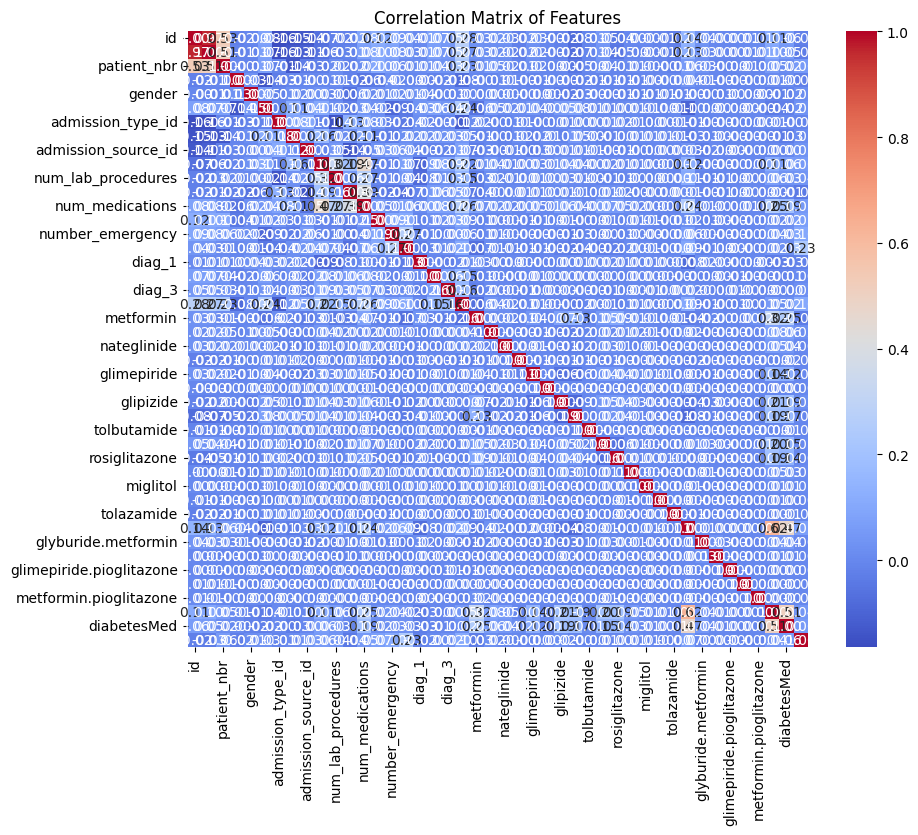

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called `df`

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Show correlation coefficients on the heatmap
    fmt=".2f",   # Format to 2 decimal places
    cmap="coolwarm",  # Color scheme
    cbar=True  # Display the color bar
)

plt.title("Correlation Matrix of Features")
plt.show()


### Retaining only highest correlated features

In [35]:
# Top highest correlated columns
# change                      0.506360
# insulin                     0.473732
# metformin                   0.251122
# glipizide                   0.189353
# num_medications             0.186886
# glyburide                   0.170294
# pioglitazone                0.145949
# rosiglitazone               0.136055
# glimepiride                 0.117763
# admission_type_id          -0.000323
# diag_3                     -0.003562
# num_procedures             -0.006839
# diag_2                     -0.009508
# gender                     -0.015926
# age                        -0.022609
# diag_1                     -0.025192
# discharge_disposition_id   -0.028914

In [36]:
df=df[['change', 'insulin', 'metformin' ,'glipizide', 'num_medications', 'glyburide',  'pioglitazone' , 'rosiglitazone',  'glimepiride',  'admission_type_id', 'diag_3', 'num_procedures','diag_2','gender','age','diag_1','discharge_disposition_id','diabetesMed']]

In [37]:
df

,change,insulin,metformin,glipizide,num_medications,glyburide,pioglitazone,rosiglitazone,glimepiride,admission_type_id,diag_3,num_procedures,diag_2,gender,age,diag_1,discharge_disposition_id,diabetesMed
0,0,0,0,0,1,0,0,0,0,6,403,0,425,1,0,250,25,0
1,1,2,0,0,18,0,0,0,0,1,255,0,250,1,1,276,1,1
2,0,0,0,1,13,0,0,0,0,1,403,5,250,1,2,648,1,1
3,1,2,0,0,16,0,0,0,0,1,403,1,250,0,3,8,1,1
4,1,1,0,1,8,0,0,0,0,1,250,0,157,0,4,197,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,1,0,16,0,0,0,0,1,458,0,291,0,7,250,3,1
101762,0,1,0,0,18,0,0,0,0,1,787,3,276,1,8,560,4,1
101763,1,3,1,0,9,0,0,0,0,1,296,0,590,0,7,38,1,1
101764,1,2,0,1,21,0,1,0,0,2,998,2,285,1,8,996,3,1


## Using ML Models

In [41]:
df_x=df.drop('diabetesMed' , axis=1)
y = df['diabetesMed']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [47]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((65128, 17), (20353, 17), (16282, 17), (65128,), (20353,), (16282,))

### DT

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred) * 100
print('Decision Tree Accuracy {:.2f}%'.format(dt_acc))
print(classification_report(y_test, dt_pred, zero_division=1))

dt_probabilities = dt_model.predict_proba(X_test)[:, 1]

Decision Tree Accuracy 98.25%
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4660
           1       0.99      0.99      0.99     15693

    accuracy                           0.98     20353
   macro avg       0.98      0.97      0.98     20353
weighted avg       0.98      0.98      0.98     20353



### RF

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


rf_accuracy = accuracy_score(y_test, rf_predictions) * 100
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy))
print(classification_report(y_test, rf_predictions, zero_division=1))

rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Random Forest Accuracy: 99.30%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4660
           1       1.00      0.99      1.00     15693

    accuracy                           0.99     20353
   macro avg       0.99      1.00      0.99     20353
weighted avg       0.99      0.99      0.99     20353



### XGBoost

In [87]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier()

eval_set = [(X_val, y_val)]

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred) * 100

print(f"XGBoost Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, xgb_pred, zero_division=1))

xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

XGBoost Accuracy: 99.31%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4660
           1       1.00      0.99      1.00     15693

    accuracy                           0.99     20353
   macro avg       0.99      1.00      0.99     20353
weighted avg       0.99      0.99      0.99     20353



### Confusion matirx

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [94]:
def conf_mat(preds, model_name):

    cm = confusion_matrix(y_test, preds)

    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


Confusion Matrix:
[[ 4433   227]
 [  129 15564]]


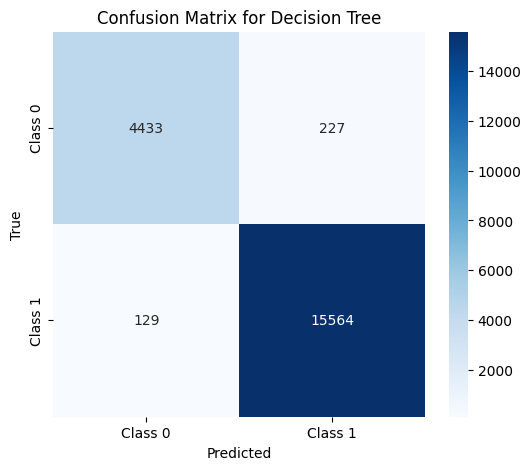

In [95]:
conf_mat(dt_pred, "Decision Tree")

Confusion Matrix:
[[ 4658     2]
 [  142 15551]]


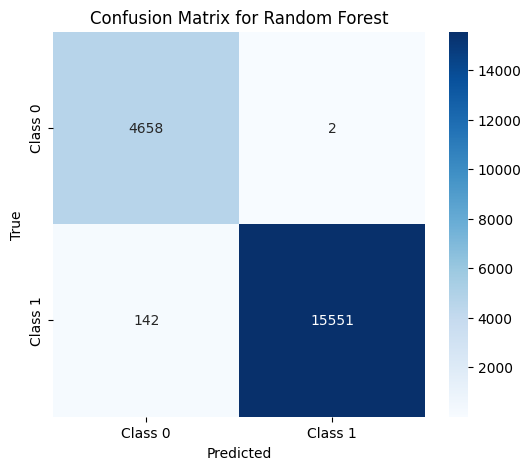

In [96]:
conf_mat(rf_pred, "Random Forest")

Confusion Matrix:
[[ 4660     0]
 [  141 15552]]


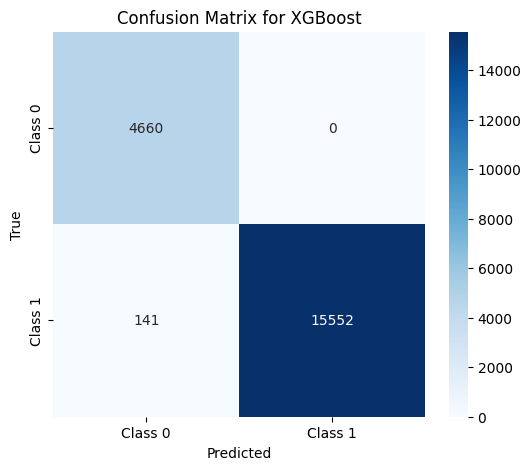

In [97]:
conf_mat(xgb_pred, "XGBoost")

### Area under ROC curve

In [98]:
from sklearn.metrics import  roc_auc_score, roc_curve, auc

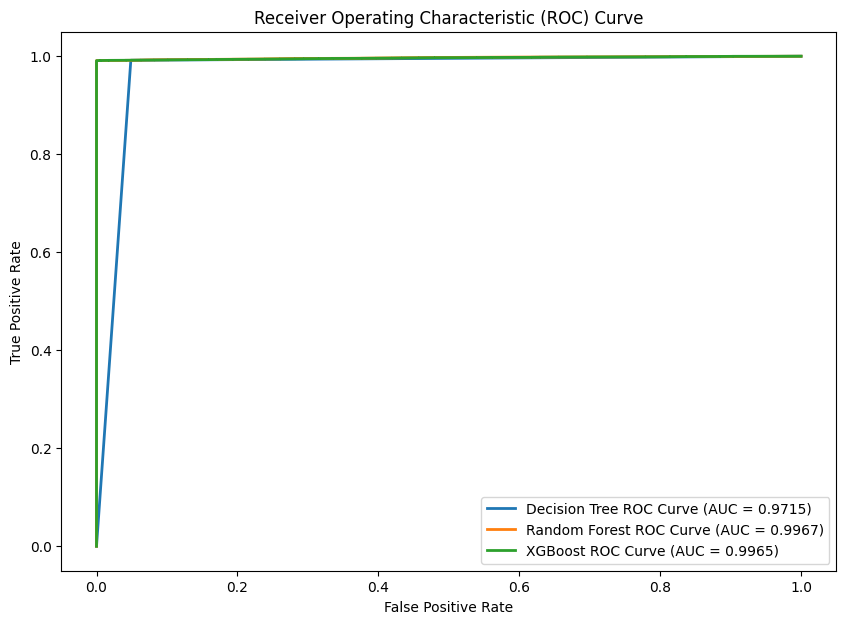

In [101]:
# xgb
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probabilities)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, thresholds_m = roc_curve(y_test, dt_probabilities)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 7))

plt.plot(fpr_dt, tpr_dt, lw=2, label=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost ROC Curve (AUC = {roc_auc_xgb:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()